# 事前処理とかの練習
---
## ギターの音を色々してみる
とりあえず、インポート

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## ギターの音源をロード
とりあえず、ロードしてみます

shape: (44100,)
sr: 22050


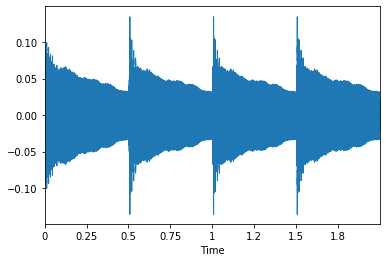

In [2]:
x, sr = librosa.load('piano2guitar/guitar/001.wav')
print('shape:', x.shape)
print('sr:', sr)
librosa.display.waveplot(x, sr=sr)

## スペクトログラムを作成する
---
短時間フーリエ変換を使ってスペクトログラムを作成する
> 短時間フーリエ変換（たんじかんフーリエへんかん、short-time Fourier transform、short-term Fourier transform、STFT）とは、関数に窓関数をずらしながら掛けて、それにフーリエ変換すること。音声など時間変化する信号の周波数と位相（の変化）を解析するためによく使われる。
> [wikipediaより](https://ja.wikipedia.org/wiki/%E7%9F%AD%E6%99%82%E9%96%93%E3%83%95%E3%83%BC%E3%83%AA%E3%82%A8%E5%A4%89%E6%8F%9B)

(1025, 87)


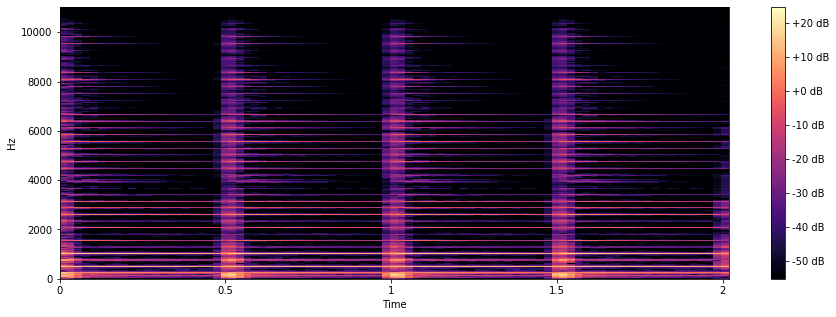

In [3]:
hop_length = 512
n_fft = 2048
d = librosa.stft(x,  n_fft=n_fft, hop_length=hop_length)
print(d.shape)
s = librosa.amplitude_to_db(np.abs(d))
plt.figure(figsize=(15, 5))
librosa.display.specshow(s, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

In [4]:
maxv = (max(np.abs(np.max(s)), np.abs(np.min(s))))
d_1 = (s/maxv).astype(np.float32)
print(s)

[[-26.078243 -40.19991  -31.35607  ... -37.010082 -45.13353  -43.339306]
 [-23.398548 -27.238234 -37.024864 ... -42.5181   -38.10119  -36.987766]
 [-21.373875 -27.31252  -50.715454 ... -55.24832  -41.495865 -33.25621 ]
 ...
 [-55.24832  -55.24832  -55.24832  ... -55.24832  -55.24832  -55.24832 ]
 [-55.24832  -55.24832  -55.24832  ... -55.24832  -55.24832  -55.24832 ]
 [-55.24832  -55.24832  -55.24832  ... -55.24832  -55.24832  -55.24832 ]]


## スペクトログラムを元に戻す
---
スペクトログラムを短時間逆フーリエ変換をかけると元の波形に戻ります
ただし、波形が伸びたり、情報損失が生まれたりします(損失は平均二乗誤差)

loss: 0.00065288687


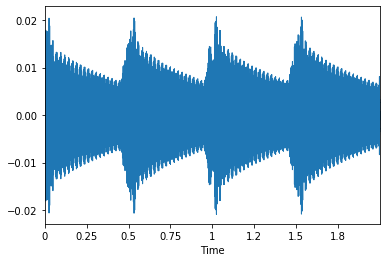

In [5]:
sd = librosa.core.db_to_amplitude(s)
y = librosa.istft(sd)
librosa.display.waveplot(y, sr=sr)
print('loss:', np.mean((x[:y.shape[0]]-y[:y.shape[0]]) ** 2) )

In [6]:
librosa.output.write_wav('out.wav', y, sr)

## 結論
---
なんか、音めっちゃ変わるしやめるわ